In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

In [129]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [56]:
countries = ["UK_RE", "FR_RE", "NL_RE", "SE_RE", "GER_RE", "IT_RE", "ES_RE", "PL_RE"]
base = [12.0, 8.6, 7.5, 7.3, 4.1, 2.9, 2.8, 1.5]
prog = [19.0, 16.0, 17.0, 12.0, 7.0, 6.0, 5.0, 5.0]
df = pd.DataFrame()
df["Countries"] = countries
df["Base"] = base
df["Prog"] = prog
df

,Countries,Base,Prog
0,UK_RE,12.0,19.0
1,FR_RE,8.6,16.0
2,NL_RE,7.5,17.0
3,SE_RE,7.3,12.0
4,GER_RE,4.1,7.0
5,IT_RE,2.9,6.0
6,ES_RE,2.8,5.0
7,PL_RE,1.5,5.0


In [ ]:
# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

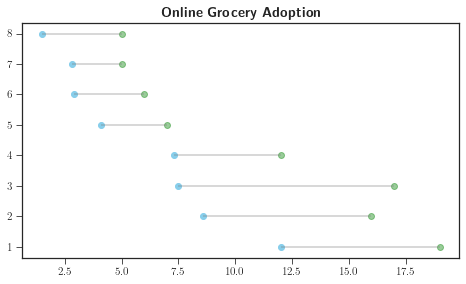

In [8]:
my_range = range(1,len(df.index)+1)
plt.style.use("seaborn-ticks")
fig, ax1 = plt.subplots(1,1, figsize=set_size(480))
ax1.set_title("\\textbf{Online Grocery Adoption}", fontsize=14)
ax1.hlines(y=my_range, xmin = df["Base"], xmax = df["Prog"], color = "grey", alpha = 0.4)
ax1.scatter(df["Base"], my_range, color = "skyblue", alpha = 1, label = "Base")
ax1.scatter(df["Prog"], my_range, color = "green", alpha = 0.4, label = "Prog")
fig.tight_layout()
plt.show()

In [79]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
def get_flag(name):
    path = "flags/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(xcoord, ycoord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.035)
    im.image.axes = ax

    ab = AnnotationBbox(im, (xcoord, ycoord),  xybox=(-26., 0.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [64]:
df

,Countries,Base,Prog
0,UK_RE,12.0,19.0
1,FR_RE,8.6,16.0
2,NL_RE,7.5,17.0
3,SE_RE,7.3,12.0
4,GER_RE,4.1,7.0
5,IT_RE,2.9,6.0
6,ES_RE,2.8,5.0
7,PL_RE,1.5,5.0


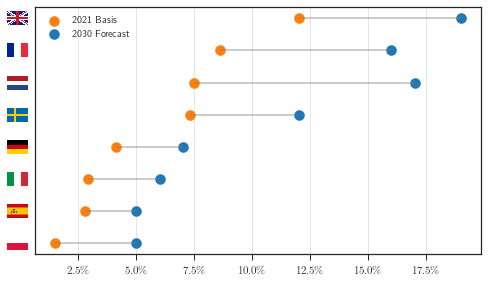

In [144]:
my_range = range(1,len(df.index)+1)
plt.style.use("seaborn-ticks")
fig, ax = plt.subplots(1,1, figsize=set_size(480))
#ax.set_title("\\textbf{Online Grocery Adoption}", fontsize=14)
ax.hlines(y=my_range, xmin = df["Base"], xmax = df["Prog"], color = "grey", alpha = 0.4)
ax.scatter(df["Base"], my_range, color = "#ff7f0e", alpha = 1, label = "2021 Basis", s=100)
ax.scatter(df["Prog"], my_range, color = "#1f77b4", alpha = 1, label = "2030 Forecast", s = 100)

#ax.tick_params(axis='y', which='major', pad=26)
#for i,c in enumerate(countries):
#    offset_image(i,c,ax)
offset_image(1,1,"UK_RE", ax)
offset_image(1,2,"FR_RE", ax)
offset_image(1,3,"NL_RE", ax)
offset_image(1,4,"SE_RE", ax)
offset_image(1,5,"GER_RE", ax)
offset_image(1,6,"IT_RE", ax)
offset_image(1,7,"ES_RE", ax)
offset_image(1,8,"PL_RE", ax)
ax.xaxis.grid(True)
ax.get_yaxis().set_visible(False)
ax.set_xticks([2.5, 5.0, 7.5,10.0,12.5,15.0,17.5],["$2.5\%$", "$5.0\%$", "$7.5\%$", 
                    "$10.0\%$", "$12.5\%$", "$15.0\%$",
                    "$17.5\%$"], rotation=0)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
fig.tight_layout()
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='center right', frameon=False,
           #fancybox=False, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)
plt.legend()

plt.show()
fig.savefig("result_graph/online_adoption.svg",bbox_inches='tight', format = "svg")